### Lead Scoring Case Study

#### 1)  Import all the libraries, import the file, drop duplicates, perform EDA, impute values and clean the dataset (fix NaN/ impute and fix irrelevant values so that data is cleaned and ready for model building). All these steps are listed under (1)

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

#Regular expressions to fetch digits
import re

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data , derive PCA and incremental PCA
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn import metrics

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mark the start timestamp of code execution
startTime = datetime.now()

print(startTime)

2019-03-03 13:01:18.984177


##### Import file and perform duplicate check

In [3]:
# Import lead scoring (ls) dataframe
lsdf = pd.read_csv("Leads.csv")
lsdf.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


##### Check percentage of dupes

In [4]:
print("(Rows, Columns) of dataset before dropping duplicates is :", format(lsdf.shape))
lsdf = lsdf.drop_duplicates('Lead Number')
print("(Rows, Columns) of dataset after dropping duplicates is :", format(lsdf.shape))
lsdf.set_index('Lead Number')
print(lsdf.shape)

(Rows, Columns) of dataset before dropping duplicates is : (9240, 37)
(Rows, Columns) of dataset after dropping duplicates is : (9240, 37)
(9240, 37)


##### Select is equivalent to NaN, replace these values as NaN and then do a total percentage of NaN's

In [5]:
lsdf = lsdf.replace(r'Select', np.NaN)

##### are all the values blank in any row?

In [6]:
lsdf.isnull().all(axis=1).sum()

0

##### Why contact those who never visited through any channel? exclude them

In [7]:
lsdf = lsdf[~np.isnan(lsdf['TotalVisits'])]
print(lsdf.shape)


(9103, 37)


##### `0.01%` of data loss is acceptable

##### Percentage of nulls > 0%

In [8]:

a = pd.DataFrame(round(100*(lsdf.isnull().sum()/len(lsdf.index)), 2)).reset_index()
a.columns = ['column_name', 'null_pct']
a = a.loc[ (a['null_pct'] > 0) , :]
a.sort_values(by='null_pct', ascending=False)

,column_name,null_pct
13,How did you hear about X Education,78.15
28,Lead Profile,74.49
25,Lead Quality,51.95
30,Asymmetrique Activity Index,45.79
31,Asymmetrique Profile Index,45.79
32,Asymmetrique Activity Score,45.79
33,Asymmetrique Profile Score,45.79
29,City,39.55
24,Tags,36.61
12,Specialization,36.30


##### What are the columns where PCT null > 60% ; let's drop them

In [9]:
print (list(a.loc[ (a['null_pct'] > 60) , :].column_name))

['How did you hear about X Education', 'Lead Profile']


In [10]:
# Let's drop them

lsdf.drop(list(a.loc[ (a['null_pct'] > 60) , :].column_name), axis=1 , inplace = True)

##### Percentage of nulls > 0%

In [11]:
a = pd.DataFrame(round(100*(lsdf.isnull().sum()/len(lsdf.index)), 2)).reset_index()
a.columns = ['column_name', 'null_pct']
a = a.loc[ (a['null_pct'] > 0) , :]
a.sort_values(by='null_pct', ascending=False)

,column_name,null_pct
24,Lead Quality,51.95
28,Asymmetrique Activity Index,45.79
29,Asymmetrique Profile Index,45.79
30,Asymmetrique Activity Score,45.79
31,Asymmetrique Profile Score,45.79
27,City,39.55
23,Tags,36.61
12,Specialization,36.30
14,What matters most to you in choosing a course,29.68
13,What is your current occupation,29.47


In [12]:
#lsdf.drop(['How did you hear about X Education','Lead Profile' ], axis=1 , inplace = True)

##### Columns with "Single value or more than 99.99 of single values, no use to analyse them hence drop them

In [13]:
lsdf.groupby("Update me on Supply Chain Content")["Lead Number"].count()

Update me on Supply Chain Content
No    9103
Name: Lead Number, dtype: int64

In [14]:
lsdf.groupby("Get updates on DM Content")["Lead Number"].count()

Get updates on DM Content
No    9103
Name: Lead Number, dtype: int64

In [15]:
lsdf.groupby("I agree to pay the amount through cheque")["Lead Number"].count()

I agree to pay the amount through cheque
No    9103
Name: Lead Number, dtype: int64

In [16]:
lsdf.groupby("A free copy of Mastering The Interview")["Lead Number"].count()

A free copy of Mastering The Interview
No     6215
Yes    2888
Name: Lead Number, dtype: int64

In [17]:
lsdf.groupby("Search")["Lead Number"].count()

Search
No     9089
Yes      14
Name: Lead Number, dtype: int64

In [18]:
lsdf.groupby("Magazine")["Lead Number"].count()

Magazine
No    9103
Name: Lead Number, dtype: int64

In [19]:
lsdf.groupby("Newspaper Article")["Lead Number"].count()

Newspaper Article
No     9101
Yes       2
Name: Lead Number, dtype: int64

In [20]:
lsdf.groupby("X Education Forums")["Lead Number"].count()

X Education Forums
No     9102
Yes       1
Name: Lead Number, dtype: int64

In [21]:
lsdf.groupby("Newspaper")["Lead Number"].count()

Newspaper
No     9102
Yes       1
Name: Lead Number, dtype: int64

In [22]:
lsdf.groupby("Digital Advertisement")["Lead Number"].count()

Digital Advertisement
No     9099
Yes       4
Name: Lead Number, dtype: int64

In [23]:
lsdf.groupby("Through Recommendations")["Lead Number"].count()

Through Recommendations
No     9096
Yes       7
Name: Lead Number, dtype: int64

In [24]:
lsdf.groupby("Receive More Updates About Our Courses")["Lead Number"].count() 

Receive More Updates About Our Courses
No    9103
Name: Lead Number, dtype: int64

In [25]:
lsdf.groupby("Do Not Call")["Lead Number"].count() 

Do Not Call
No     9101
Yes       2
Name: Lead Number, dtype: int64

##### Impute how customer came in to the system`Indicating whether the customer had seen the ad in any of the listed items.`. these are split up in columns, that needs to be `stiched` to one column ; however the number of `YES` are significantly smaller i.e `<100` and does not contribute to any prediction and due to this we decided to drop it to avoid unnecessary computation that does not contribute to the model 

In [26]:
 lsdf = lsdf.drop([ 'Update me on Supply Chain Content', 
                    'Get updates on DM Content', 
                    'I agree to pay the amount through cheque', 
                    'Search', 
                    'Magazine', 
                    'Newspaper Article',
                    'X Education Forums', 
                    'Newspaper', 
                    'Digital Advertisement', 
                    'Through Recommendations', 
                    'Receive More Updates About Our Courses',
                     'Do Not Call' ,   
                    'Asymmetrique Activity Index', 
                    'Asymmetrique Profile Index'], axis=1)
# Since we have asymmetric scores which is all we need for predictions, we don't find index columns too useful

##### Improve column visibility within Jupyter window. Improved visibility means you can see all the columns (including the ones after dummification

In [27]:
# Since column count is more than the default Jupyter settings, let's refit the visible columns
# Expect some new column additions for deriving new dummy columns from existing data hence setting the column limit 100
pd.set_option('max_columns', 200)
pd.set_option('display.max_colwidth', 150)
lsdf.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,City,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,Interested in other courses,Low in Relevance,NaN,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,Ringing,NaN,NaN,15.0,15.0,No,Email Opened


##### Impute values

In [28]:
lsdf['Specialization'] = lsdf['Specialization'].fillna('none')
lsdf['Specialization'] = (lsdf['Specialization'].str.strip()).str.upper()
#lsdf.groupby("Specialization")["Lead Number"].count()

In [29]:
lsdf['Lead Source'] = lsdf['Lead Source'].fillna('Lead_Add_Form')
lsdf['Lead Source'] = lsdf['Lead Source'].str.replace('google', 'Google')
lsdf['Lead Source'] = lsdf['Lead Source'].str.replace('youtubechannel', 'Google')
lsdf['Lead Source'] = lsdf['Lead Source'].str.replace('Pay per Click Ads', 'Click2call')
lsdf['Lead Source'] = lsdf['Lead Source'].str.replace('Olark Chat', 'Chat')
lsdf['Lead Source'] = lsdf['Lead Source'].str.replace('Live Chat', 'Chat')
lsdf['Lead Source'] = lsdf['Lead Source'].str.replace('welearnblog_Home', 'WeLearn')
lsdf['Lead Source'] = lsdf['Lead Source'].str.replace('Facebook', 'Social Media')
lsdf['Lead Source'] = (lsdf['Lead Source'].str.strip()).str.upper()
#lsdf.groupby("Lead Source")["Lead Number"].count()

In [30]:
lsdf['TotalVisits'] = lsdf['TotalVisits'].fillna(0)
lsdf['TotalVisits'] = lsdf['TotalVisits'].replace([10,11,12,13,14,15,15,16,17,18,19,20 ,
                                                  21,22,23,24,25,26,27,28,29,30,31,32,
                                                  41,42,43,54,55,74,115,141,251],10)
#lsdf.groupby("TotalVisits")["Lead Number"].count()

In [31]:
lsdf['Last Activity'] = lsdf['Last Activity'].fillna('Form Submitted on Website') 
lsdf['Last Activity'] = (lsdf['Last Activity'].str.strip()).str.upper()
#lsdf.groupby("Last Activity")["Lead Number"].count()

In [32]:
lsdf['Country'] = lsdf['Country'].fillna('Unknown') 
tmp = lsdf.loc[(lsdf['Country'] == 'India') | (lsdf['Country'] == 'Unknown')]
tmp1 = lsdf.loc[~((lsdf['Country'] == 'India') | (lsdf['Country'] == 'Unknown'))]
tmp1['Country'] = 'Others'
lsdf = pd.concat([tmp, tmp1], axis = 0)
lsdf['Country'] = (lsdf['Country'].str.strip()).str.upper()
#lsdf.groupby("Country")["Lead Number"].count()

In [33]:
lsdf['City'] = lsdf['City'].fillna('Unknown') 
#lsdf['City'] = lsdf['City'].str.replace('Select', 'Unknown')
lsdf['City'] = (lsdf['City'].str.strip()).str.upper()
#lsdf.groupby("City")["Lead Number"].count()

In [34]:
lsdf['What matters most to you in choosing a course'] = lsdf['What matters most to you in choosing a course'].fillna('Other') 
lsdf['What matters most to you in choosing a course'] = (lsdf['What matters most to you in choosing a course'].str.strip()).str.upper()
#lsdf.groupby("What matters most to you in choosing a course")["Lead Number"].count()

In [35]:
lsdf['What is your current occupation'] = lsdf['What is your current occupation'].fillna('Unknown') 
lsdf['What is your current occupation'] = (lsdf['What is your current occupation'].str.strip()).str.upper()
#lsdf.groupby("What is your current occupation")["Lead Number"].count()

In [36]:
lsdf['Tags'] = lsdf['Tags'].fillna('Unknown') 
lsdf['Tags'] = (lsdf['Tags'].str.strip()).str.upper()
#lsdf.groupby("Tags")["Lead Number"].count()

In [37]:
lsdf['Lead Quality'] = lsdf['Lead Quality'].fillna('Not Sure') 
lsdf['Lead Quality'] = (lsdf['Lead Quality'].str.strip()).str.upper()
#lsdf.groupby("Lead Quality")["Lead Number"].count()

In [38]:
lsdf['Asymmetrique Activity Score'] = lsdf['Asymmetrique Activity Score'].fillna('0') 
lsdf['Asymmetrique Activity Score'] = lsdf['Asymmetrique Activity Score'].apply(pd.to_numeric)

In [39]:
lsdf['Asymmetrique Profile Score'] = lsdf['Asymmetrique Profile Score'].fillna('0') 
lsdf['Asymmetrique Profile Score'] = lsdf['Asymmetrique Profile Score'].apply(pd.to_numeric)

In [40]:
lsdf['Last Notable Activity'] = (lsdf['Last Notable Activity'].str.strip()).str.upper()
#lsdf.groupby("Last Notable Activity")["Lead Number"].count()

In [41]:
lsdf['Page Views Per Visit'] = lsdf['Page Views Per Visit'].fillna(1) 

In [42]:
a = pd.DataFrame(round(100*(lsdf.isnull().sum()/len(lsdf.index)), 2)).reset_index()
a.columns = ['column_name', 'null_pct']
a = a.loc[ (a['null_pct'] > 0) , :]
a.sort_values(by='null_pct', ascending=False)

,column_name,null_pct


In [43]:
lsdf.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Quality,City,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,CHAT,No,0,0.0,0,0.0,PAGE VISITED ON WEBSITE,UNKNOWN,NONE,UNEMPLOYED,BETTER CAREER PROSPECTS,INTERESTED IN OTHER COURSES,LOW IN RELEVANCE,UNKNOWN,15.0,15.0,No,MODIFIED
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,ORGANIC SEARCH,No,0,5.0,674,2.5,EMAIL OPENED,INDIA,NONE,UNEMPLOYED,BETTER CAREER PROSPECTS,RINGING,NOT SURE,UNKNOWN,15.0,15.0,No,EMAIL OPENED


##### Convert `Do Not Email`  and `A free copy of Mastering The Interview` column from Yes/No to 1/0 

In [44]:
varlist =  ['Do Not Email' , 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lsdf[varlist] = lsdf[varlist].apply(binary_map)

##### 2)  Next step is `Dummification` of `Categorical variables`

In [45]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
lo = pd.get_dummies(lsdf['Lead Origin'],prefix='Lead Origin',drop_first=True)
lsdf = pd.concat([lsdf, lo],axis=1)

ls = pd.get_dummies(lsdf['Lead Source'],prefix='Lead Source',drop_first=True)
lsdf = pd.concat([lsdf, ls],axis=1)

la = pd.get_dummies(lsdf['Last Activity'],prefix='Last Activity',drop_first=True)
lsdf = pd.concat([lsdf, la],axis=1)

Country = pd.get_dummies(lsdf['Country'],prefix='Country',drop_first=True)
lsdf = pd.concat([lsdf, Country],axis=1)

sp = pd.get_dummies(lsdf['Specialization'],prefix='Specialization',drop_first=True)
lsdf = pd.concat([lsdf, sp],axis=1)

#hf = pd.get_dummies(lsdf['How did you hear about X Education'],prefix='How did you hear about X Education',drop_first=True)
#lsdf = pd.concat([lsdf, hf],axis=1)

oc = pd.get_dummies(lsdf['What is your current occupation'],prefix='What is your current occupation',drop_first=True)
lsdf = pd.concat([lsdf, oc],axis=1)

wm = pd.get_dummies(lsdf['What matters most to you in choosing a course'], prefix='What matters most to you in choosing a course', drop_first =True)
lsdf = pd.concat([lsdf, wm], axis=1)

tags = pd.get_dummies(lsdf['Tags'], prefix = 'Tags', drop_first = True)
lsdf = pd.concat([lsdf, tags], axis=1)

lq = pd.get_dummies(lsdf['Lead Quality'], prefix = 'Lead Quality', drop_first =True)
lsdf= pd.concat([lsdf, lq], axis =1)

#lpr = pd.get_dummies(lsdf['Lead Profile'], prefix = 'Lead Profile', drop_first = True)
#lsdf = pd.concat ([lsdf, lpr], axis =1)

city =pd.get_dummies(lsdf['City'], prefix = 'City', drop_first= True)
lsdf = pd.concat ([lsdf, city], axis =1)

#aa =pd.get_dummies(lsdf['Asymmetrique Activity Index'], prefix = 'Asymmetrique Activity Index', drop_first= True)
#lsdf = pd.concat ([lsdf, aa], axis =1)

#ap =pd.get_dummies(lsdf['Asymmetrique Profile Index'], prefix = 'Asymmetrique Profile Index', drop_first= True)
#lsdf = pd.concat ([lsdf, ap], axis =1)

ln = pd.get_dummies(lsdf['Last Notable Activity'], prefix ='Last Notable Activity', drop_first = True)
lsdf = pd.concat ([lsdf, ln], axis =1)

In [46]:
#lsdf.head(2)
lsdf = lsdf.drop(['Lead Origin',
                    'Lead Source',
                    'Last Activity', 
                    'Country', 
                    'Specialization',
                #    'How did you hear about X Education',
                    'What is your current occupation',
                    'What matters most to you in choosing a course',
                    'Tags',
                    'Lead Quality',
                 #   'Lead Profile',
                    'City',
                    'Last Notable Activity'], 1)

lsdf.head(2)

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_BLOG,Lead Source_CHAT,Lead Source_CLICK2CALL,Lead Source_DIRECT TRAFFIC,Lead Source_GOOGLE,Lead Source_LEAD_ADD_FORM,Lead Source_NC_EDM,Lead Source_ORGANIC SEARCH,Lead Source_PRESS_RELEASE,Lead Source_REFERENCE,Lead Source_REFERRAL SITES,Lead Source_SOCIAL MEDIA,Lead Source_TESTONE,Lead Source_WELEARN,Lead Source_WELINGAK WEBSITE,Last Activity_CONVERTED TO LEAD,Last Activity_EMAIL BOUNCED,Last Activity_EMAIL LINK CLICKED,Last Activity_EMAIL MARKED SPAM,Last Activity_EMAIL OPENED,Last Activity_EMAIL RECEIVED,Last Activity_FORM SUBMITTED ON WEBSITE,Last Activity_HAD A PHONE CONVERSATION,Last Activity_OLARK CHAT CONVERSATION,Last Activity_PAGE VISITED ON WEBSITE,Last Activity_RESUBSCRIBED TO EMAILS,Last Activity_SMS SENT,Last Activity_UNREACHABLE,Last Activity_UNSUBSCRIBED,Last Activity_VIEW IN BROWSER LINK CLICKED,Last Activity_VISITED BOOTH IN TRADESHOW,Country_OTHERS,Country_UNKNOWN,Specialization_BUSINESS ADMINISTRATION,Specialization_E-BUSINESS,Specialization_E-COMMERCE,Specialization_FINANCE MANAGEMENT,Specialization_HEALTHCARE MANAGEMENT,Specialization_HOSPITALITY MANAGEMENT,Specialization_HUMAN RESOURCE MANAGEMENT,Specialization_INTERNATIONAL BUSINESS,Specialization_IT PROJECTS MANAGEMENT,Specialization_MARKETING MANAGEMENT,Specialization_MEDIA AND ADVERTISING,Specialization_NONE,Specialization_OPERATIONS MANAGEMENT,Specialization_RETAIL MANAGEMENT,Specialization_RURAL AND AGRIBUSINESS,Specialization_SERVICES EXCELLENCE,Specialization_SUPPLY CHAIN MANAGEMENT,Specialization_TRAVEL AND TOURISM,What is your current occupation_HOUSEWIFE,What is your current occupation_OTHER,What is your current occupation_STUDENT,What is your current occupation_UNEMPLOYED,What is your current occupation_UNKNOWN,What is your current occupation_WORKING PROFESSIONAL,What matters most to you in choosing a course_FLEXIBILITY & CONVENIENCE,What matters most to you in choosing a course_OTHER,Tags_BUSY,Tags_CLOSED BY HORIZZON,Tags_DIPLOMA HOLDER (NOT ELIGIBLE),Tags_GRADUATION IN PROGRESS,Tags_IN CONFUSION WHETHER PART TIME OR DLP,Tags_IN TOUCH WITH EINS,Tags_INTERESTED IN FULL TIME MBA,Tags_INTERESTED IN NEXT BATCH,Tags_INTERESTED IN OTHER COURSES,Tags_INVALID NUMBER,Tags_LATERAL STUDENT,Tags_LOST TO EINS,Tags_LOST TO OTHERS,Tags_NOT DOING FURTHER EDUCATION,Tags_NUMBER NOT PROVIDED,Tags_OPP HANGUP,Tags_RECOGNITION ISSUE (DEC APPROVAL),Tags_RINGING,Tags_SHALL TAKE IN THE NEXT COMING MONTH,Tags_STILL THINKING,Tags_SWITCHED OFF,Tags_UNIVERSITY NOT RECOGNIZED,Tags_UNKNOWN,Tags_WANT TO TAKE ADMISSION BUT HAS FINANCIAL PROBLEMS,Tags_WILL REVERT AFTER READING THE EMAIL,Tags_WRONG NUMBER GIVEN,Lead Quality_LOW IN RELEVANCE,Lead Quality_MIGHT BE,Lead Quality_NOT SURE,Lead Quality_WORST,City_OTHER CITIES,City_OTHER CITIES OF MAHARASHTRA,City_OTHER METRO CITIES,City_THANE & OUTSKIRTS,City_TIER II CITIES,City_UNKNOWN,Last Notable Activity_EMAIL BOUNCED,Last Notable Activity_EMAIL LINK CLICKED,Last Notable Activity_EMAIL MARKED SPAM,Last Notable Activity_EMAIL OPENED,Last Notable Activity_EMAIL RECEIVED,Last Notable Activity_FORM SUBMITTED ON WEBSITE,Last Notable Activity_HAD A PHONE CONVERSATION,Last Notable Activity_MODIFIED,Last Notable Activity_OLARK CHAT CONVERSATION,Last Notable Activity_PAGE VISITED ON WEBSITE,Last Notable Activity_RESUBSCRIBED TO EMAILS,Last Notable Activity_SMS SENT,Last Notable Activity_UNREACHABLE,Last Notable Activity_UNSUBSCRIBED,Last Notable Activity_VIEW IN BROWSER LINK CLICKED
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,15.0,15.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [47]:
#lsdf.head(2)
# X = lsdf.drop(['Converted','Prospect ID' , 'Lead Number'], axis=1)
X = lsdf
X.head(2)

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_BLOG,Lead Source_CHAT,Lead Source_CLICK2CALL,Lead Source_DIRECT TRAFFIC,Lead Source_GOOGLE,Lead Source_LEAD_ADD_FORM,Lead Source_NC_EDM,Lead Source_ORGANIC SEARCH,Lead Source_PRESS_RELEASE,Lead Source_REFERENCE,Lead Source_REFERRAL SITES,Lead Source_SOCIAL MEDIA,Lead Source_TESTONE,Lead Source_WELEARN,Lead Source_WELINGAK WEBSITE,Last Activity_CONVERTED TO LEAD,Last Activity_EMAIL BOUNCED,Last Activity_EMAIL LINK CLICKED,Last Activity_EMAIL MARKED SPAM,Last Activity_EMAIL OPENED,Last Activity_EMAIL RECEIVED,Last Activity_FORM SUBMITTED ON WEBSITE,Last Activity_HAD A PHONE CONVERSATION,Last Activity_OLARK CHAT CONVERSATION,Last Activity_PAGE VISITED ON WEBSITE,Last Activity_RESUBSCRIBED TO EMAILS,Last Activity_SMS SENT,Last Activity_UNREACHABLE,Last Activity_UNSUBSCRIBED,Last Activity_VIEW IN BROWSER LINK CLICKED,Last Activity_VISITED BOOTH IN TRADESHOW,Country_OTHERS,Country_UNKNOWN,Specialization_BUSINESS ADMINISTRATION,Specialization_E-BUSINESS,Specialization_E-COMMERCE,Specialization_FINANCE MANAGEMENT,Specialization_HEALTHCARE MANAGEMENT,Specialization_HOSPITALITY MANAGEMENT,Specialization_HUMAN RESOURCE MANAGEMENT,Specialization_INTERNATIONAL BUSINESS,Specialization_IT PROJECTS MANAGEMENT,Specialization_MARKETING MANAGEMENT,Specialization_MEDIA AND ADVERTISING,Specialization_NONE,Specialization_OPERATIONS MANAGEMENT,Specialization_RETAIL MANAGEMENT,Specialization_RURAL AND AGRIBUSINESS,Specialization_SERVICES EXCELLENCE,Specialization_SUPPLY CHAIN MANAGEMENT,Specialization_TRAVEL AND TOURISM,What is your current occupation_HOUSEWIFE,What is your current occupation_OTHER,What is your current occupation_STUDENT,What is your current occupation_UNEMPLOYED,What is your current occupation_UNKNOWN,What is your current occupation_WORKING PROFESSIONAL,What matters most to you in choosing a course_FLEXIBILITY & CONVENIENCE,What matters most to you in choosing a course_OTHER,Tags_BUSY,Tags_CLOSED BY HORIZZON,Tags_DIPLOMA HOLDER (NOT ELIGIBLE),Tags_GRADUATION IN PROGRESS,Tags_IN CONFUSION WHETHER PART TIME OR DLP,Tags_IN TOUCH WITH EINS,Tags_INTERESTED IN FULL TIME MBA,Tags_INTERESTED IN NEXT BATCH,Tags_INTERESTED IN OTHER COURSES,Tags_INVALID NUMBER,Tags_LATERAL STUDENT,Tags_LOST TO EINS,Tags_LOST TO OTHERS,Tags_NOT DOING FURTHER EDUCATION,Tags_NUMBER NOT PROVIDED,Tags_OPP HANGUP,Tags_RECOGNITION ISSUE (DEC APPROVAL),Tags_RINGING,Tags_SHALL TAKE IN THE NEXT COMING MONTH,Tags_STILL THINKING,Tags_SWITCHED OFF,Tags_UNIVERSITY NOT RECOGNIZED,Tags_UNKNOWN,Tags_WANT TO TAKE ADMISSION BUT HAS FINANCIAL PROBLEMS,Tags_WILL REVERT AFTER READING THE EMAIL,Tags_WRONG NUMBER GIVEN,Lead Quality_LOW IN RELEVANCE,Lead Quality_MIGHT BE,Lead Quality_NOT SURE,Lead Quality_WORST,City_OTHER CITIES,City_OTHER CITIES OF MAHARASHTRA,City_OTHER METRO CITIES,City_THANE & OUTSKIRTS,City_TIER II CITIES,City_UNKNOWN,Last Notable Activity_EMAIL BOUNCED,Last Notable Activity_EMAIL LINK CLICKED,Last Notable Activity_EMAIL MARKED SPAM,Last Notable Activity_EMAIL OPENED,Last Notable Activity_EMAIL RECEIVED,Last Notable Activity_FORM SUBMITTED ON WEBSITE,Last Notable Activity_HAD A PHONE CONVERSATION,Last Notable Activity_MODIFIED,Last Notable Activity_OLARK CHAT CONVERSATION,Last Notable Activity_PAGE VISITED ON WEBSITE,Last Notable Activity_RESUBSCRIBED TO EMAILS,Last Notable Activity_SMS SENT,Last Notable Activity_UNREACHABLE,Last Notable Activity_UNSUBSCRIBED,Last Notable Activity_VIEW IN BROWSER LINK CLICKED
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,15.0,15.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [48]:
print("Shape after dummification is:" ,format(lsdf.shape))

Shape after dummification is: (9103, 123)


In [49]:
### Checking the Conversion Rate
print(" Lead Conversion rate is :", format((sum(lsdf['Converted'])/len(lsdf['Converted'].index))*100))

 Lead Conversion rate is : 38.02043282434362


##### Normalising continuous features

In [50]:
df = lsdf[['Total Time Spent on Website',
           'Page Views Per Visit',
           'Asymmetrique Activity Score',
           'Asymmetrique Profile Score']]
#X_train.head(2)

normalized_df=(df-df.mean())/df.std()
lsdf = lsdf.drop(['Total Time Spent on Website',
                    'Page Views Per Visit',
                    'Asymmetrique Activity Score',
                    'Asymmetrique Profile Score'], 1)
lsdf = pd.concat([lsdf,normalized_df],axis=1)
lsdf.head(2)

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_BLOG,Lead Source_CHAT,Lead Source_CLICK2CALL,Lead Source_DIRECT TRAFFIC,Lead Source_GOOGLE,Lead Source_LEAD_ADD_FORM,Lead Source_NC_EDM,Lead Source_ORGANIC SEARCH,Lead Source_PRESS_RELEASE,Lead Source_REFERENCE,Lead Source_REFERRAL SITES,Lead Source_SOCIAL MEDIA,Lead Source_TESTONE,Lead Source_WELEARN,Lead Source_WELINGAK WEBSITE,Last Activity_CONVERTED TO LEAD,Last Activity_EMAIL BOUNCED,Last Activity_EMAIL LINK CLICKED,Last Activity_EMAIL MARKED SPAM,Last Activity_EMAIL OPENED,Last Activity_EMAIL RECEIVED,Last Activity_FORM SUBMITTED ON WEBSITE,Last Activity_HAD A PHONE CONVERSATION,Last Activity_OLARK CHAT CONVERSATION,Last Activity_PAGE VISITED ON WEBSITE,Last Activity_RESUBSCRIBED TO EMAILS,Last Activity_SMS SENT,Last Activity_UNREACHABLE,Last Activity_UNSUBSCRIBED,Last Activity_VIEW IN BROWSER LINK CLICKED,Last Activity_VISITED BOOTH IN TRADESHOW,Country_OTHERS,Country_UNKNOWN,Specialization_BUSINESS ADMINISTRATION,Specialization_E-BUSINESS,Specialization_E-COMMERCE,Specialization_FINANCE MANAGEMENT,Specialization_HEALTHCARE MANAGEMENT,Specialization_HOSPITALITY MANAGEMENT,Specialization_HUMAN RESOURCE MANAGEMENT,Specialization_INTERNATIONAL BUSINESS,Specialization_IT PROJECTS MANAGEMENT,Specialization_MARKETING MANAGEMENT,Specialization_MEDIA AND ADVERTISING,Specialization_NONE,Specialization_OPERATIONS MANAGEMENT,Specialization_RETAIL MANAGEMENT,Specialization_RURAL AND AGRIBUSINESS,Specialization_SERVICES EXCELLENCE,Specialization_SUPPLY CHAIN MANAGEMENT,Specialization_TRAVEL AND TOURISM,What is your current occupation_HOUSEWIFE,What is your current occupation_OTHER,What is your current occupation_STUDENT,What is your current occupation_UNEMPLOYED,What is your current occupation_UNKNOWN,What is your current occupation_WORKING PROFESSIONAL,What matters most to you in choosing a course_FLEXIBILITY & CONVENIENCE,What matters most to you in choosing a course_OTHER,Tags_BUSY,Tags_CLOSED BY HORIZZON,Tags_DIPLOMA HOLDER (NOT ELIGIBLE),Tags_GRADUATION IN PROGRESS,Tags_IN CONFUSION WHETHER PART TIME OR DLP,Tags_IN TOUCH WITH EINS,Tags_INTERESTED IN FULL TIME MBA,Tags_INTERESTED IN NEXT BATCH,Tags_INTERESTED IN OTHER COURSES,Tags_INVALID NUMBER,Tags_LATERAL STUDENT,Tags_LOST TO EINS,Tags_LOST TO OTHERS,Tags_NOT DOING FURTHER EDUCATION,Tags_NUMBER NOT PROVIDED,Tags_OPP HANGUP,Tags_RECOGNITION ISSUE (DEC APPROVAL),Tags_RINGING,Tags_SHALL TAKE IN THE NEXT COMING MONTH,Tags_STILL THINKING,Tags_SWITCHED OFF,Tags_UNIVERSITY NOT RECOGNIZED,Tags_UNKNOWN,Tags_WANT TO TAKE ADMISSION BUT HAS FINANCIAL PROBLEMS,Tags_WILL REVERT AFTER READING THE EMAIL,Tags_WRONG NUMBER GIVEN,Lead Quality_LOW IN RELEVANCE,Lead Quality_MIGHT BE,Lead Quality_NOT SURE,Lead Quality_WORST,City_OTHER CITIES,City_OTHER CITIES OF MAHARASHTRA,City_OTHER METRO CITIES,City_THANE & OUTSKIRTS,City_TIER II CITIES,City_UNKNOWN,Last Notable Activity_EMAIL BOUNCED,Last Notable Activity_EMAIL LINK CLICKED,Last Notable Activity_EMAIL MARKED SPAM,Last Notable Activity_EMAIL OPENED,Last Notable Activity_EMAIL RECEIVED,Last Notable Activity_FORM SUBMITTED ON WEBSITE,Last Notable Activity_HAD A PHONE CONVERSATION,Last Notable Activity_MODIFIED,Last Notable Activity_OLARK CHAT CONVERSATION,Last Notable Activity_PAGE VISITED ON WEBSITE,Last Notable Activity_RESUBSCRIBED TO EMAILS,Last Notable Activity_SMS SENT,Last Notable Activity_UNREACHABLE,Last Notable Activity_UNSUBSCRIBED,Last Notable Activity_VIEW IN BROWSER LINK CLICKED,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

##### Check `Normalised` columns for Outliers

In [51]:
#lsdf.head(2)

In [52]:
lsdf_num = lsdf[['Total Time Spent on Website','Page Views Per Visit', 'Asymmetrique Activity Score' , 'Asymmetrique Profile Score']]

In [53]:
lsdf_num.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9.103000e+03,9.103000e+03,9.103000e+03,9.103000e+03
mean,6.244471e-18,-9.077900e-16,-1.873341e-16,8.742259e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.831040e-01,-1.093181e+00,-1.076960e+00,-1.073887e+00
25%,-8.665923e-01,-6.305213e-01,-1.076960e+00,-1.073887e+00
50%,-4.354519e-01,-1.678620e-01,7.271048e-01,6.236644e-01
75%,8.038472e-01,2.947973e-01,8.658790e-01,8.661717e-01
90%,1.634022e+00,1.220116e+00,1.004653e+00,1.108679e+00
95%,1.973247e+00,1.682775e+00,1.143427e+00,1.229933e+00
99%,2.490725e+00,3.070753e+00,1.282202e+00,1.351186e+00


{'whiskers': [<matplotlib.lines.Line2D at 0x7f6bbcd84390>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6bbcd84978>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f6bbcd84128>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6bbcde3208>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6bbcde3630>],
 'means': []}

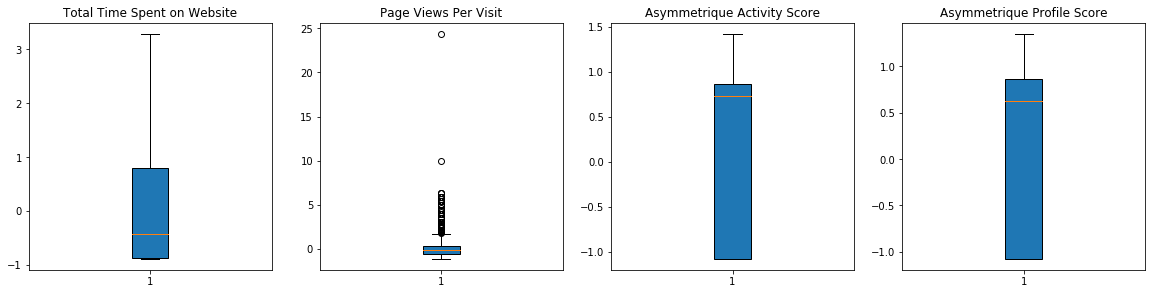

In [54]:
plt.figure(1 , figsize=(20, 10))

#Syntax for Reference line "axhline" snf "patch_artist" is sourced from https://matplotlib.org

# subplot 1
plt.subplot(2, 4, 1)
plt.title("Total Time Spent on Website")
plt.boxplot(lsdf['Total Time Spent on Website'] , patch_artist=True)
#plt.axhline(-4.35, color='black', lw=.5)

# subplot 2 
plt.subplot(2, 4, 2)
plt.title("Page Views Per Visit")
plt.boxplot(lsdf['Page Views Per Visit'], patch_artist=True)
#plt.axhline(-1.68, color='black', lw=.5)

# subplot 2 
plt.subplot(2, 4, 3)
plt.title("Asymmetrique Activity Score")
plt.boxplot(lsdf['Asymmetrique Activity Score'], patch_artist=True)
#plt.axhline(7.27, color='black', lw=.5)

# subplot 2 
plt.subplot(2, 4, 4)
plt.title("Asymmetrique Profile Score")
plt.boxplot(lsdf['Asymmetrique Profile Score'], patch_artist=True)
#plt.axhline(6.23, color='black', lw=.5)


##### We see few outliers for  `Page views Per Visit`. let's clean that up

In [55]:
# outlier treatment for gdpp
Q1 = lsdf['Page Views Per Visit'].quantile(0.25)
Q3 = lsdf['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
dropped_lsdf = lsdf[~((lsdf['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (lsdf['Page Views Per Visit'] <= Q3 + 1.5*IQR))]
lsdf = lsdf[((lsdf['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (lsdf['Page Views Per Visit'] <= Q3 + 1.5*IQR))]

In [56]:
dropped_lsdf.shape

(360, 123)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6bbccbb588>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6bbccbbb70>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f6bbccbb320>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6bbccc4400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6bbccc4828>],
 'means': []}

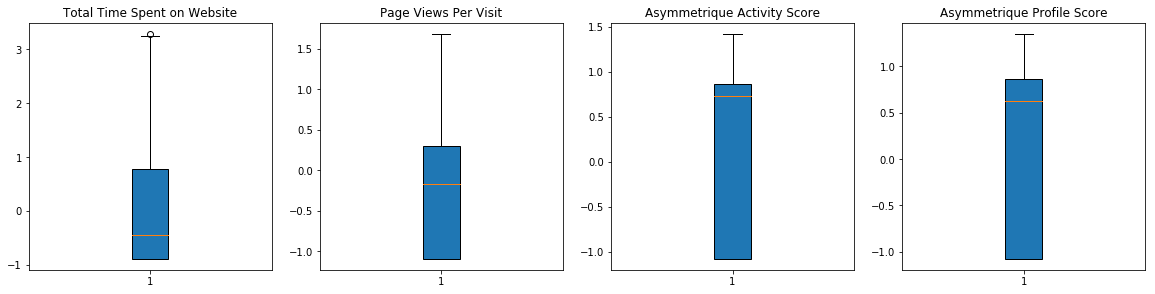

In [57]:
plt.figure(1 , figsize=(20, 10))

#Syntax for Reference line "axhline" snf "patch_artist" is sourced from https://matplotlib.org

# subplot 1
plt.subplot(2, 4, 1)
plt.title("Total Time Spent on Website")
plt.boxplot(lsdf['Total Time Spent on Website'] , patch_artist=True)
#plt.axhline(-4.35, color='black', lw=.5)

# subplot 2 
plt.subplot(2, 4, 2)
plt.title("Page Views Per Visit")
plt.boxplot(lsdf['Page Views Per Visit'], patch_artist=True)
#plt.axhline(-1.68, color='black', lw=.5)

# subplot 2 
plt.subplot(2, 4, 3)
plt.title("Asymmetrique Activity Score")
plt.boxplot(lsdf['Asymmetrique Activity Score'], patch_artist=True)
#plt.axhline(7.27, color='black', lw=.5)

# subplot 2 
plt.subplot(2, 4, 4)
plt.title("Asymmetrique Profile Score")
plt.boxplot(lsdf['Asymmetrique Profile Score'], patch_artist=True)
#plt.axhline(6.23, color='black', lw=.5)



##### Continuous variables look all good now!  we just dropped 360 rows and really small percentage of records  [ 0.05% ] 

In [58]:
lsdf.shape

(8743, 123)

In [59]:
lsdf = lsdf.reindex()

##### Store `Prospect ID` and `Lead number` columns for `merging` once model is trained/tested 

In [60]:
ProspectID_df = pd.DataFrame(lsdf['Prospect ID']).reindex()
leadnum_df = pd.DataFrame(lsdf['Lead Number']).reindex()

In [61]:
#lsdf.head(2)
lsdf = lsdf.drop(['Prospect ID', 'Lead Number'], 1)

#### 3) Test-Train Split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X = lsdf.drop(['Converted'], axis=1)

In [64]:
# Putting response variable to y
y = lsdf['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

##### Split data into test and train datasets

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [66]:
X.head(2)


,Do Not Email,TotalVisits,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_BLOG,Lead Source_CHAT,Lead Source_CLICK2CALL,Lead Source_DIRECT TRAFFIC,Lead Source_GOOGLE,Lead Source_LEAD_ADD_FORM,Lead Source_NC_EDM,Lead Source_ORGANIC SEARCH,Lead Source_PRESS_RELEASE,Lead Source_REFERENCE,Lead Source_REFERRAL SITES,Lead Source_SOCIAL MEDIA,Lead Source_TESTONE,Lead Source_WELEARN,Lead Source_WELINGAK WEBSITE,Last Activity_CONVERTED TO LEAD,Last Activity_EMAIL BOUNCED,Last Activity_EMAIL LINK CLICKED,Last Activity_EMAIL MARKED SPAM,Last Activity_EMAIL OPENED,Last Activity_EMAIL RECEIVED,Last Activity_FORM SUBMITTED ON WEBSITE,Last Activity_HAD A PHONE CONVERSATION,Last Activity_OLARK CHAT CONVERSATION,Last Activity_PAGE VISITED ON WEBSITE,Last Activity_RESUBSCRIBED TO EMAILS,Last Activity_SMS SENT,Last Activity_UNREACHABLE,Last Activity_UNSUBSCRIBED,Last Activity_VIEW IN BROWSER LINK CLICKED,Last Activity_VISITED BOOTH IN TRADESHOW,Country_OTHERS,Country_UNKNOWN,Specialization_BUSINESS ADMINISTRATION,Specialization_E-BUSINESS,Specialization_E-COMMERCE,Specialization_FINANCE MANAGEMENT,Specialization_HEALTHCARE MANAGEMENT,Specialization_HOSPITALITY MANAGEMENT,Specialization_HUMAN RESOURCE MANAGEMENT,Specialization_INTERNATIONAL BUSINESS,Specialization_IT PROJECTS MANAGEMENT,Specialization_MARKETING MANAGEMENT,Specialization_MEDIA AND ADVERTISING,Specialization_NONE,Specialization_OPERATIONS MANAGEMENT,Specialization_RETAIL MANAGEMENT,Specialization_RURAL AND AGRIBUSINESS,Specialization_SERVICES EXCELLENCE,Specialization_SUPPLY CHAIN MANAGEMENT,Specialization_TRAVEL AND TOURISM,What is your current occupation_HOUSEWIFE,What is your current occupation_OTHER,What is your current occupation_STUDENT,What is your current occupation_UNEMPLOYED,What is your current occupation_UNKNOWN,What is your current occupation_WORKING PROFESSIONAL,What matters most to you in choosing a course_FLEXIBILITY & CONVENIENCE,What matters most to you in choosing a course_OTHER,Tags_BUSY,Tags_CLOSED BY HORIZZON,Tags_DIPLOMA HOLDER (NOT ELIGIBLE),Tags_GRADUATION IN PROGRESS,Tags_IN CONFUSION WHETHER PART TIME OR DLP,Tags_IN TOUCH WITH EINS,Tags_INTERESTED IN FULL TIME MBA,Tags_INTERESTED IN NEXT BATCH,Tags_INTERESTED IN OTHER COURSES,Tags_INVALID NUMBER,Tags_LATERAL STUDENT,Tags_LOST TO EINS,Tags_LOST TO OTHERS,Tags_NOT DOING FURTHER EDUCATION,Tags_NUMBER NOT PROVIDED,Tags_OPP HANGUP,Tags_RECOGNITION ISSUE (DEC APPROVAL),Tags_RINGING,Tags_SHALL TAKE IN THE NEXT COMING MONTH,Tags_STILL THINKING,Tags_SWITCHED OFF,Tags_UNIVERSITY NOT RECOGNIZED,Tags_UNKNOWN,Tags_WANT TO TAKE ADMISSION BUT HAS FINANCIAL PROBLEMS,Tags_WILL REVERT AFTER READING THE EMAIL,Tags_WRONG NUMBER GIVEN,Lead Quality_LOW IN RELEVANCE,Lead Quality_MIGHT BE,Lead Quality_NOT SURE,Lead Quality_WORST,City_OTHER CITIES,City_OTHER CITIES OF MAHARASHTRA,City_OTHER METRO CITIES,City_THANE & OUTSKIRTS,City_TIER II CITIES,City_UNKNOWN,Last Notable Activity_EMAIL BOUNCED,Last Notable Activity_EMAIL LINK CLICKED,Last Notable Activity_EMAIL MARKED SPAM,Last Notable Activity_EMAIL OPENED,Last Notable Activity_EMAIL RECEIVED,Last Notable Activity_FORM SUBMITTED ON WEBSITE,Last Notable Activity_HAD A PHONE CONVERSATION,Last Notable Activity_MODIFIED,Last Notable Activity_OLARK CHAT CONVERSATION,Last Notable Activity_PAGE VISITED ON WEBSITE,Last Notable Activity_RESUBSCRIBED TO EMAILS,Last Notable Activity_SMS SENT,Last Notable Activity_UNREACHABLE,Last Notable Activity_UNSUBSCRIBED,Last Notable Activity_VIEW IN BROWSER LINK CLICKED,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.883104,-1.093181,1.004653,0.744918
1,0,5.0,0,0,0,0,0,0,0,0

#### 4) Feature scaling using StandardScaler()

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website',
         'Page Views Per Visit',
         'Asymmetrique Activity Score',
         'Asymmetrique Profile Score']] = scaler.fit_transform(X_train[['Total Time Spent on Website',
                                                                        'Page Views Per Visit',
                                                                        'Asymmetrique Activity Score',
                                                                        'Asymmetrique Profile Score']])

In [69]:
print("Shape of train dataset: ", format(X_train.shape))

Shape of train dataset:  (6120, 120)


#### 5) Logistic Regression Model building using LogisticRegression() function 

#####  Since there are 123 columns, let's build model picking best `3` columns using RFE and then use LogisticRegression() function to fit training dataset

In [70]:
X.head(2)

,Do Not Email,TotalVisits,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_BLOG,Lead Source_CHAT,Lead Source_CLICK2CALL,Lead Source_DIRECT TRAFFIC,Lead Source_GOOGLE,Lead Source_LEAD_ADD_FORM,Lead Source_NC_EDM,Lead Source_ORGANIC SEARCH,Lead Source_PRESS_RELEASE,Lead Source_REFERENCE,Lead Source_REFERRAL SITES,Lead Source_SOCIAL MEDIA,Lead Source_TESTONE,Lead Source_WELEARN,Lead Source_WELINGAK WEBSITE,Last Activity_CONVERTED TO LEAD,Last Activity_EMAIL BOUNCED,Last Activity_EMAIL LINK CLICKED,Last Activity_EMAIL MARKED SPAM,Last Activity_EMAIL OPENED,Last Activity_EMAIL RECEIVED,Last Activity_FORM SUBMITTED ON WEBSITE,Last Activity_HAD A PHONE CONVERSATION,Last Activity_OLARK CHAT CONVERSATION,Last Activity_PAGE VISITED ON WEBSITE,Last Activity_RESUBSCRIBED TO EMAILS,Last Activity_SMS SENT,Last Activity_UNREACHABLE,Last Activity_UNSUBSCRIBED,Last Activity_VIEW IN BROWSER LINK CLICKED,Last Activity_VISITED BOOTH IN TRADESHOW,Country_OTHERS,Country_UNKNOWN,Specialization_BUSINESS ADMINISTRATION,Specialization_E-BUSINESS,Specialization_E-COMMERCE,Specialization_FINANCE MANAGEMENT,Specialization_HEALTHCARE MANAGEMENT,Specialization_HOSPITALITY MANAGEMENT,Specialization_HUMAN RESOURCE MANAGEMENT,Specialization_INTERNATIONAL BUSINESS,Specialization_IT PROJECTS MANAGEMENT,Specialization_MARKETING MANAGEMENT,Specialization_MEDIA AND ADVERTISING,Specialization_NONE,Specialization_OPERATIONS MANAGEMENT,Specialization_RETAIL MANAGEMENT,Specialization_RURAL AND AGRIBUSINESS,Specialization_SERVICES EXCELLENCE,Specialization_SUPPLY CHAIN MANAGEMENT,Specialization_TRAVEL AND TOURISM,What is your current occupation_HOUSEWIFE,What is your current occupation_OTHER,What is your current occupation_STUDENT,What is your current occupation_UNEMPLOYED,What is your current occupation_UNKNOWN,What is your current occupation_WORKING PROFESSIONAL,What matters most to you in choosing a course_FLEXIBILITY & CONVENIENCE,What matters most to you in choosing a course_OTHER,Tags_BUSY,Tags_CLOSED BY HORIZZON,Tags_DIPLOMA HOLDER (NOT ELIGIBLE),Tags_GRADUATION IN PROGRESS,Tags_IN CONFUSION WHETHER PART TIME OR DLP,Tags_IN TOUCH WITH EINS,Tags_INTERESTED IN FULL TIME MBA,Tags_INTERESTED IN NEXT BATCH,Tags_INTERESTED IN OTHER COURSES,Tags_INVALID NUMBER,Tags_LATERAL STUDENT,Tags_LOST TO EINS,Tags_LOST TO OTHERS,Tags_NOT DOING FURTHER EDUCATION,Tags_NUMBER NOT PROVIDED,Tags_OPP HANGUP,Tags_RECOGNITION ISSUE (DEC APPROVAL),Tags_RINGING,Tags_SHALL TAKE IN THE NEXT COMING MONTH,Tags_STILL THINKING,Tags_SWITCHED OFF,Tags_UNIVERSITY NOT RECOGNIZED,Tags_UNKNOWN,Tags_WANT TO TAKE ADMISSION BUT HAS FINANCIAL PROBLEMS,Tags_WILL REVERT AFTER READING THE EMAIL,Tags_WRONG NUMBER GIVEN,Lead Quality_LOW IN RELEVANCE,Lead Quality_MIGHT BE,Lead Quality_NOT SURE,Lead Quality_WORST,City_OTHER CITIES,City_OTHER CITIES OF MAHARASHTRA,City_OTHER METRO CITIES,City_THANE & OUTSKIRTS,City_TIER II CITIES,City_UNKNOWN,Last Notable Activity_EMAIL BOUNCED,Last Notable Activity_EMAIL LINK CLICKED,Last Notable Activity_EMAIL MARKED SPAM,Last Notable Activity_EMAIL OPENED,Last Notable Activity_EMAIL RECEIVED,Last Notable Activity_FORM SUBMITTED ON WEBSITE,Last Notable Activity_HAD A PHONE CONVERSATION,Last Notable Activity_MODIFIED,Last Notable Activity_OLARK CHAT CONVERSATION,Last Notable Activity_PAGE VISITED ON WEBSITE,Last Notable Activity_RESUBSCRIBED TO EMAILS,Last Notable Activity_SMS SENT,Last Notable Activity_UNREACHABLE,Last Notable Activity_UNSUBSCRIBED,Last Notable Activity_VIEW IN BROWSER LINK CLICKED,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.883104,-1.093181,1.004653,0.744918
1,0,5.0,0,0,0,0,0,0,0,0

In [71]:
#import statsmodels.api as sm
# Logistic regression model
#logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
#logm1.fit().summary()

In [72]:
# Running RFE with the output number of the variable equal to 10
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg= LogisticRegression()


In [73]:
rfe = RFE(logreg, 15) # pick 3 best variables/columns
rfe = rfe.fit(X_train, y_train)

In [74]:
#list(zip(X_train.columns,rfe.support_,rfe.ranking_))
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False,  True, False,  True, False, False,  True,  True,
       False,  True, False, False,  True, False,  True, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False])

In [75]:
col = X_train.columns[rfe.support_]
#X_train.columns[~rfe.support_]
col

Index(['Lead Source_WELINGAK WEBSITE', 'Last Activity_SMS SENT',
       'What matters most to you in choosing a course_OTHER',
       'Tags_CLOSED BY HORIZZON', 'Tags_INVALID NUMBER', 'Tags_LOST TO EINS',
       'Tags_NUMBER NOT PROVIDED', 'Tags_OPP HANGUP', 'Tags_RINGING',
       'Tags_SWITCHED OFF', 'Tags_UNKNOWN',
       'Tags_WILL REVERT AFTER READING THE EMAIL', 'Tags_WRONG NUMBER GIVEN',
       'Lead Quality_WORST', 'Last Notable Activity_MODIFIED'],
      dtype='object')

##### Assessing the model with StatsModels GLM (Generalized Linear Model Regression ) summary

In [76]:
X_train_sm = sm.add_constant(X_train[col])
logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6120
Model:                            GLM   Df Residuals:                     6104
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1256.5
Date:                Sun, 03 Mar 2019   Deviance:                       2513.0
Time:                        13:01:38   Pearson chi2:                 1.53e+04
No. Iterations:                    23   Covariance Type:             nonrobust
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -1.9508      0.139    -14.083      0.000      -2.222      -1.679
Lead Source_WELINGAK WEBSITE                            3.0996      1.031      3.007      0.003       1.079       5.120
Last Activity_SMS SENT                                  2.4515      0.121     20.295      0.000       2.215       2.688
What matters most to you in choosing a course_OTHER    -2.6787      0.151    -17.768      0.000      -2.974      -2.383
Tags_CLOSED BY HORIZZON                                 8.1399      1.015      8.019      0.000       6.150      10.129
Tags_INVALID NUMBER                                    -2.6278      1.052     -2.497      0.013      -4.690      -0.565
Tags_LOST TO EINS                                       7.7806      0.570     13.660      0.000       6.664       8.897
Tags_NUMBER NOT PROVIDED                              -23.9110   2.87e+04     -0.001      0.999   -5.62e+04    5.62e+04
Tags_OPP HANGUP                                       -23.4721   2.37e+04     -0.001      0.999   -4.65e+04    4.64e+04
Tags_RINGING                                           -2.8624      0.253    -11.327      0.000      -3.358      -2.367
Tags_SWITCHED OFF                                      -3.1637      0.534     -5.928      0.000      -4.210      -2.118
Tags_UNKNOWN                                            2.3687      0.176     13.428      0.000       2.023       2.714
Tags_WILL REVERT AFTER READING THE EMAIL                5.1148      0.205     24.980      0.000       4.714       5.516
Tags_WRONG NUMBER GIVEN                               -23.6690   2.07e+04     -0.001      0.999   -4.05e+04    4.05e+04
Lead Quality_WORST                                     -2.6659      0.591     -4.508      0.000      -3.825      -1.507
Last Notable Activity_MODIFIED                         -1.5262      0.122    -12.475      0.000      -1.766      -1.286
=======================================================================================================================
"""

As can be clearly seen, `Tags_NUMBER NOT PROVIDED` has a very high p-value. We should remove it. 
`Reasoning: p-value is probability that you reject the null hypothesis, given that the null hypothesis is true; If  p-value is over 0.50 it's probable that the finding is false and hence we intend not to predict using this variable
    

In [77]:
col = col.drop('Tags_NUMBER NOT PROVIDED')

In [78]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6120
Model:                            GLM   Df Residuals:                     6105
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.1
Date:                Sun, 03 Mar 2019   Deviance:                       2526.1
Time:                        13:01:38   Pearson chi2:                 1.49e+04
No. Iterations:                    23   Covariance Type:             nonrobust
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -2.0132      0.138    -14.543      0.000      -2.284      -1.742
Lead Source_WELINGAK WEBSITE                            3.0995      1.030      3.008      0.003       1.080       5.119
Last Activity_SMS SENT                                  2.4269      0.120     20.211      0.000       2.192       2.662
What matters most to you in choosing a course_OTHER    -2.6705      0.150    -17.774      0.000      -2.965      -2.376
Tags_CLOSED BY HORIZZON                                 8.1869      1.015      8.065      0.000       6.197      10.177
Tags_INVALID NUMBER                                    -2.5492      1.052     -2.424      0.015      -4.610      -0.488
Tags_LOST TO EINS                                       7.8159      0.569     13.730      0.000       6.700       8.932
Tags_OPP HANGUP                                       -23.3943   2.38e+04     -0.001      0.999   -4.66e+04    4.65e+04
Tags_RINGING                                           -2.7797      0.251    -11.054      0.000      -3.273      -2.287
Tags_SWITCHED OFF                                      -3.0800      0.533     -5.779      0.000      -4.125      -2.035
Tags_UNKNOWN                                            2.4300      0.176     13.798      0.000       2.085       2.775
Tags_WILL REVERT AFTER READING THE EMAIL                5.1705      0.205     25.256      0.000       4.769       5.572
Tags_WRONG NUMBER GIVEN                               -23.5903   2.07e+04     -0.001      0.999   -4.06e+04    4.05e+04
Lead Quality_WORST                                     -2.6211      0.594     -4.410      0.000      -3.786      -1.456
Last Notable Activity_MODIFIED                         -1.5074      0.122    -12.341      0.000      -1.747      -1.268
=======================================================================================================================
"""

`Tags_OPP HANGUP` is another variable having very high p-value. remove it and rebuild model

In [79]:
col = col.drop('Tags_OPP HANGUP')

In [80]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6120
Model:                            GLM   Df Residuals:                     6106
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1269.3
Date:                Sun, 03 Mar 2019   Deviance:                       2538.5
Time:                        13:01:39   Pearson chi2:                 1.47e+04
No. Iterations:                    22   Covariance Type:             nonrobust
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -2.0782      0.138    -15.071      0.000      -2.348      -1.808
Lead Source_WELINGAK WEBSITE                            3.0990      1.030      3.009      0.003       1.080       5.118
Last Activity_SMS SENT                                  2.4124      0.120     20.187      0.000       2.178       2.647
What matters most to you in choosing a course_OTHER    -2.6662      0.150    -17.785      0.000      -2.960      -2.372
Tags_CLOSED BY HORIZZON                                 8.2384      1.015      8.116      0.000       6.249      10.228
Tags_INVALID NUMBER                                    -2.4737      1.051     -2.354      0.019      -4.534      -0.414
Tags_LOST TO EINS                                       7.8637      0.569     13.815      0.000       6.748       8.979
Tags_RINGING                                           -2.7030      0.250    -10.795      0.000      -3.194      -2.212
Tags_SWITCHED OFF                                      -3.0027      0.532     -5.640      0.000      -4.046      -1.959
Tags_UNKNOWN                                            2.4933      0.176     14.195      0.000       2.149       2.838
Tags_WILL REVERT AFTER READING THE EMAIL                5.2291      0.205     25.567      0.000       4.828       5.630
Tags_WRONG NUMBER GIVEN                               -22.5156   1.26e+04     -0.002      0.999   -2.46e+04    2.46e+04
Lead Quality_WORST                                     -2.6183      0.595     -4.402      0.000      -3.784      -1.452
Last Notable Activity_MODIFIED                         -1.4904      0.122    -12.212      0.000      -1.730      -1.251
=======================================================================================================================
"""

`Tags_WRONG NUMBER GIVEN` has slightly higher p-value compared to the rest of columns and we intend to remove that and rebuild model

In [81]:
col = col.drop('Tags_WRONG NUMBER GIVEN')

In [82]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6120
Model:                            GLM   Df Residuals:                     6107
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1278.5
Date:                Sun, 03 Mar 2019   Deviance:                       2556.9
Time:                        13:01:39   Pearson chi2:                 1.44e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -2.1664      0.138    -15.737      0.000      -2.436      -1.897
Lead Source_WELINGAK WEBSITE                            3.0993      1.030      3.010      0.003       1.081       5.117
Last Activity_SMS SENT                                  2.3825      0.119     20.080      0.000       2.150       2.615
What matters most to you in choosing a course_OTHER    -2.6564      0.149    -17.788      0.000      -2.949      -2.364
Tags_CLOSED BY HORIZZON                                 8.3152      1.015      8.191      0.000       6.325      10.305
Tags_INVALID NUMBER                                    -2.3627      1.050     -2.250      0.024      -4.421      -0.304
Tags_LOST TO EINS                                       7.9328      0.569     13.936      0.000       6.817       9.049
Tags_RINGING                                           -2.5899      0.249    -10.409      0.000      -3.078      -2.102
Tags_SWITCHED OFF                                      -2.8883      0.532     -5.433      0.000      -3.930      -1.846
Tags_UNKNOWN                                            2.5823      0.175     14.741      0.000       2.239       2.926
Tags_WILL REVERT AFTER READING THE EMAIL                5.3133      0.204     25.996      0.000       4.913       5.714
Lead Quality_WORST                                     -2.6133      0.595     -4.389      0.000      -3.780      -1.446
Last Notable Activity_MODIFIED                         -1.4755      0.122    -12.110      0.000      -1.714      -1.237
=======================================================================================================================
"""

##### p-values look all good now.  Let's plot the `heatmap` of the final variabels picked up by RFE and Logistic regression model

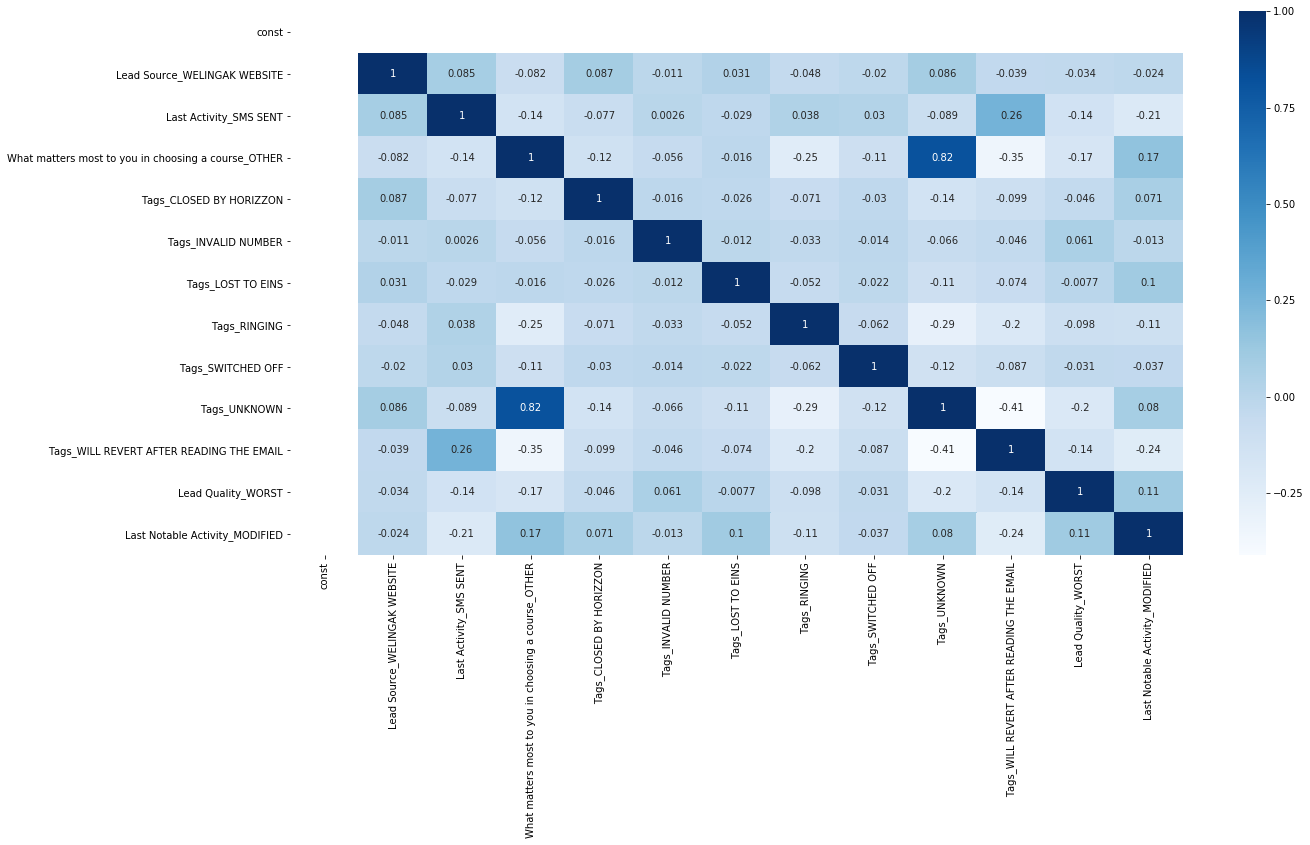

In [83]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (20,10))
sns.heatmap(X_train_sm.corr(),annot = True , cmap = "Blues" )
plt.show()

correlation between variables  `Tags_UNKNOWN` and `What matters most to you in choosing a course_OTHER` is `0.81`. We intend to drop  `Tags_UNKNOWN` column and rebuild the model. the reason we do it because the column does not appear to have much relevance

In [84]:
col = col.drop('Tags_UNKNOWN')

In [85]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6120
Model:                            GLM   Df Residuals:                     6108
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1403.6
Date:                Sun, 03 Mar 2019   Deviance:                       2807.3
Time:                        13:01:41   Pearson chi2:                 1.37e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=======================================================================================================================
                                                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                  -0.8999      0.086    -10.447      0.000      -1.069      -0.731
Lead Source_WELINGAK WEBSITE                            4.4889      1.028      4.365      0.000       2.473       6.505
Last Activity_SMS SENT                                  2.2229      0.109     20.463      0.000       2.010       2.436
What matters most to you in choosing a course_OTHER    -1.2259      0.111    -11.094      0.000      -1.442      -1.009
Tags_CLOSED BY HORIZZON                                 7.2340      1.010      7.162      0.000       5.254       9.214
Tags_INVALID NUMBER                                    -3.4624      1.047     -3.307      0.001      -5.515      -1.410
Tags_LOST TO EINS                                       6.2590      0.576     10.874      0.000       5.131       7.387
Tags_RINGING                                           -3.7147      0.233    -15.936      0.000      -4.172      -3.258
Tags_SWITCHED OFF                                      -4.0078      0.524     -7.643      0.000      -5.036      -2.980
Tags_WILL REVERT AFTER READING THE EMAIL                4.1594      0.178     23.433      0.000       3.811       4.507
Lead Quality_WORST                                     -3.3601      0.491     -6.847      0.000      -4.322      -2.398
Last Notable Activity_MODIFIED                         -1.6790      0.117    -14.322      0.000      -1.909      -1.449
=======================================================================================================================
"""

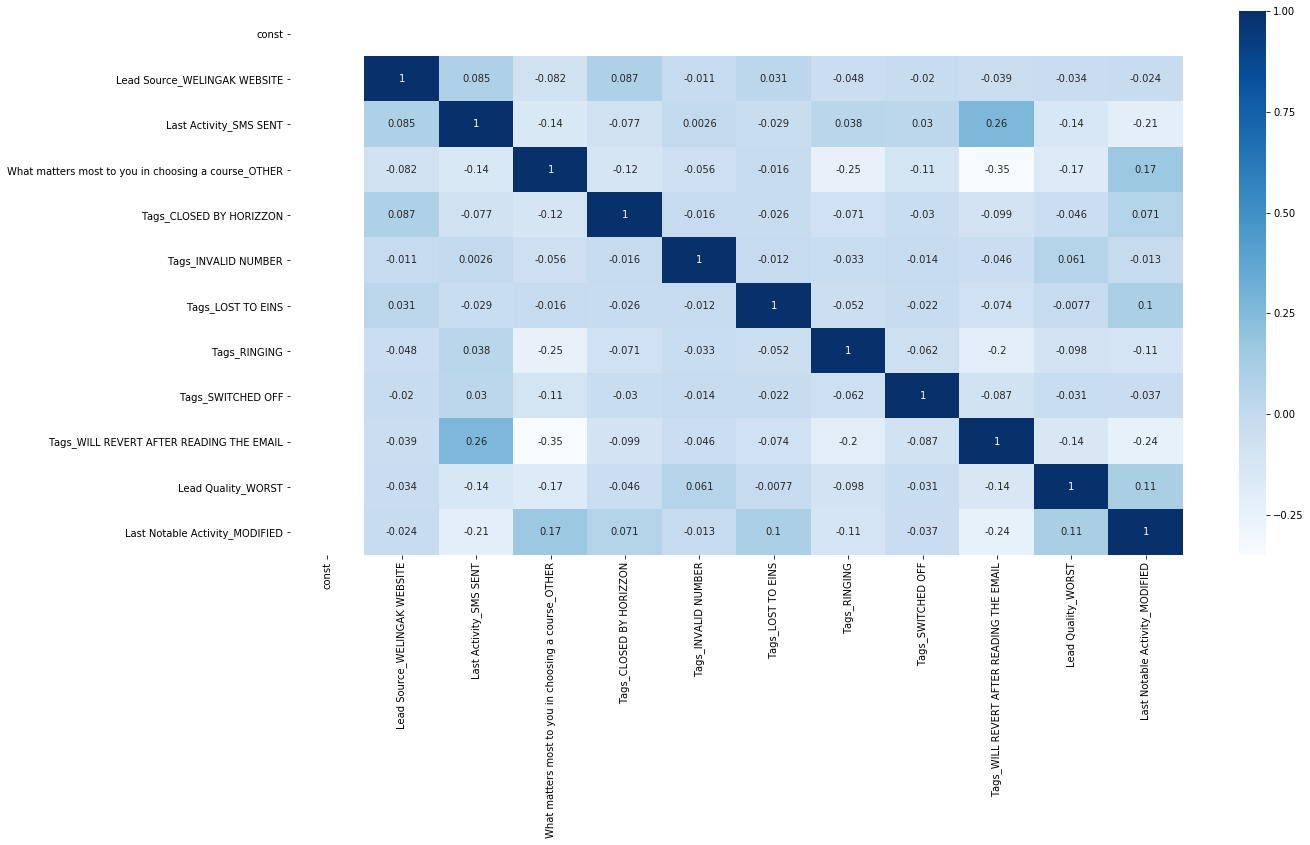

In [86]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train_sm.corr(),annot = True , cmap = "Blues" )
plt.show()

##### As can be seen, heat map looks good and p-values look good

In [87]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:5]

5225    0.789684
2794    0.995858
7433    0.963011
8901    0.070507
1782    0.289071
dtype: float64

In [88]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.78968443, 0.9958578 , 0.96301142, 0.07050749, 0.28907147,
       0.9958578 , 0.07050749, 0.52426145, 0.10661436, 0.10661436])

#### 6) Creating a dataframe with the `actual `Converted leads (`0/1`) and the `predicted` probabilities

In [89]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_predicted':y_train_pred})
tmp_df = pd.merge( leadnum_df, ProspectID_df, left_index=True, right_index=True)
y_train_pred_final = pd.merge(tmp_df, y_train_pred_final, left_index=True, right_index=True)
#y_train_pred_final['pred_idx'] = y_train.index
y_train_pred_final.head()

,Lead Number,Prospect ID,Converted,Convert_predicted
0,660737,7927b2df-8bba-4d29-b9a2-b6e0beafe620,1,0.789684
1,660728,2a272436-5132-4136-86fa-dcc88c88f482,1,0.995858
2,660727,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,0.963011
3,660719,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0.070507
4,660681,3256f628-e534-4826-9d63-4a8b88782852,0,0.289071


##### Creating new column 'predicted' with 1 if Convert_predicted > 0.5 else 0

In [90]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_predicted.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Lead Number,Prospect ID,Converted,Convert_predicted,predicted
0,660737,7927b2df-8bba-4d29-b9a2-b6e0beafe620,1,0.789684,1
1,660728,2a272436-5132-4136-86fa-dcc88c88f482,1,0.995858,1
2,660727,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,0.963011,1
3,660719,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0.070507,0
4,660681,3256f628-e534-4826-9d63-4a8b88782852,0,0.289071,0


In [91]:
#y_train_pred_final.head()
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.917590027700831


#### 7) Check Confusion matrix

In [92]:
from sklearn import metrics

In [93]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted.round() )
print(confusion)

[[3394  173]
 [ 303 1906]]


In [94]:
#### Confusion matrix 
#### array([[3920,   55],
####       [ 730, 1763]])

##### Check Accuracy score

In [95]:
print("Accuracy score is : " , format(round(metrics.accuracy_score(y_train_pred_final.Converted,
                                                             y_train_pred_final.predicted),3)))

Accuracy score is :  0.918


#### 8) Check Variance Inflation Factor

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Tags_CLOSED BY HORIZZON,1.05
0,Lead Source_WELINGAK WEBSITE,1.04
5,Tags_LOST TO EINS,1.03
7,Tags_SWITCHED OFF,1.03
4,Tags_INVALID NUMBER,1.01
9,Lead Quality_WORST,0.40
10,Last Notable Activity_MODIFIED,0.12
8,Tags_WILL REVERT AFTER READING THE EMAIL,0.08
2,What matters most to you in choosing a course_OTHER,0.03
1,Last Activity_SMS SENT,0.02


##### VIF is well within the range and looks good ! 

#### 9) Let's calculate `Sensitivity-Specificity` by checking `True Positive`, `False Positive`, `True Negative` and `False Negative` scores

In [98]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Sensitivity of Logistic Regression model", format(TP / float(TP+FN)))
print("Specificity of Logistic Regression model", format(TN / float(TN+FP)))
print("False Positive rate of Logistic Regression model", format(FP/ float(TN+FP)))
print("Positive Predictive value of Logistic Regression model", format(TP / float(TP+FP)))
print("Negative Predictive value of Logistic Regression model", format(TN / float(TN+ FN)))

Sensitivity of Logistic Regression model 0.8628338614757809
Specificity of Logistic Regression model 0.9514998598261845
False Positive rate of Logistic Regression model 0.04850014017381553
Positive Predictive value of Logistic Regression model 0.9167869167869168
Negative Predictive value of Logistic Regression model 0.9180416553962673


#### 10) Plot ROC curve

In [99]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [100]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Convert_predicted, drop_intermediate = False )

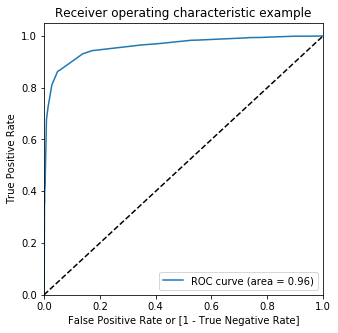

In [101]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_predicted)

#### 11) Find Optimum cut-off point 

In [102]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_predicted.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead Number,Prospect ID,Converted,Convert_predicted,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,660737,7927b2df-8bba-4d29-b9a2-b6e0beafe620,1,0.789684,1,1,1,1,1,1,1,1,1,0,0
1,660728,2a272436-5132-4136-86fa-dcc88c88f482,1,0.995858,1,1,1,1,1,1,1,1,1,1,1
2,660727,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,0.963011,1,1,1,1,1,1,1,1,1,1,1
3,660719,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0.070507,0,1,0,0,0,0,0,0,0,0,0
4,660681,3256f628-e534-4826-9d63-4a8b88782852,0,0.289071,0,1,1,1,0,0,0,0,0,0,0


In [103]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.382445     1.000000     0.000000
0.1          0.1  0.768006     0.965595     0.645641
0.2          0.2  0.887985     0.931191     0.861228
0.3          0.3  0.914127     0.869172     0.941968
0.4          0.4  0.914127     0.869172     0.941968
0.5          0.5  0.917590     0.862834     0.951500
0.6          0.6  0.909972     0.808963     0.972526
0.7          0.7  0.909972     0.808963     0.972526
0.8          0.8  0.885561     0.723404     0.985983
0.9          0.9  0.869979     0.673608     0.991590


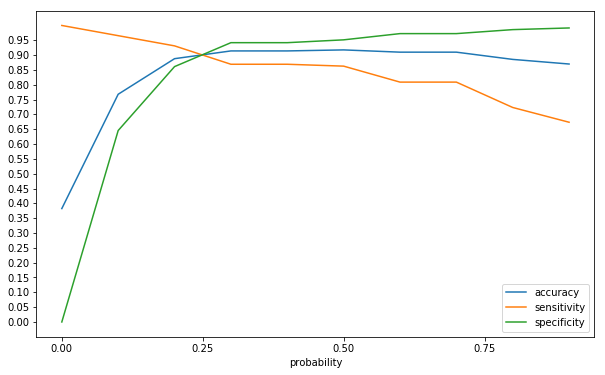

In [104]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'], figsize=(10,6))
plt.yticks(np.arange(0, 1, 0.05))
plt.xticks(np.arange(0, 1, 0.25))
plt.show()

##### From sensitivity/specificity curve above, `0.25` is the optimum point to take it as a cutoff probability.

In [105]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_predicted.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Lead Number,Prospect ID,Converted,Convert_predicted,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,660737,7927b2df-8bba-4d29-b9a2-b6e0beafe620,1,0.789684,1,1,1,1,1,1,1,1,1,0,0,1
1,660728,2a272436-5132-4136-86fa-dcc88c88f482,1,0.995858,1,1,1,1,1,1,1,1,1,1,1,1
2,660727,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,0.963011,1,1,1,1,1,1,1,1,1,1,1,1
3,660719,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0.070507,0,1,0,0,0,0,0,0,0,0,0,0
4,660681,3256f628-e534-4826-9d63-4a8b88782852,0,0.289071,0,1,1,1,0,0,0,0,0,0,0,1


In [106]:
# Let's check the overall accuracy.
print("Overall model accuracy (on train data set):" , format(round(metrics.accuracy_score(y_train_pred_final.Converted, 
                                                          y_train_pred_final.final_predicted),3)))

Overall model accuracy (on train data set): 0.888


In [107]:
confusion_cutoff = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_cutoff

array([[3072,  495],
       [ 152, 2057]])

In [108]:
TP = confusion_cutoff[1,1] # true positive 
TN = confusion_cutoff[0,0] # true negatives
FP = confusion_cutoff[0,1] # false positives
FN = confusion_cutoff[1,0] # false negatives
print("Sensitivity of Logistic Regression model", format(TP / float(TP+FN)))
print("Specificity of Logistic Regression model", format(TN / float(TN+FP)))
print("False Positive rate of Logistic Regression model", format(FP/ float(TN+FP)))
print("Positive Predictive value of Logistic Regression model", format(TP / float(TP+FP)))
print("Negative Predictive value of Logistic Regression model", format(TN / float(TN+ FN)))

Sensitivity of Logistic Regression model 0.9311905839746492
Specificity of Logistic Regression model 0.8612279226240538
False Positive rate of Logistic Regression model 0.13877207737594618
Positive Predictive value of Logistic Regression model 0.8060344827586207
Negative Predictive value of Logistic Regression model 0.9528535980148883


#### 12) Compute Precision and Recall

##### Precision
TP / TP + FP

##### Recall
TP / TP + FN

In [109]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3394,  173],
       [ 303, 1906]])

In [110]:
print("Precision is :", format(confusion[1,1]/(confusion[0,1]+confusion[1,1])))
print("Recall is :", format(confusion[1,1]/(confusion[1,0]+confusion[1,1])))

Precision is : 0.9167869167869168
Recall is : 0.8628338614757809


In [111]:
from sklearn.metrics import precision_score, recall_score
print("Precision score:", format(precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)))
print("Recall score:", format(recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)))

Precision score: 0.9167869167869168
Recall score: 0.8628338614757809


##### Compute trade-off curve

In [112]:
from sklearn.metrics import precision_recall_curve

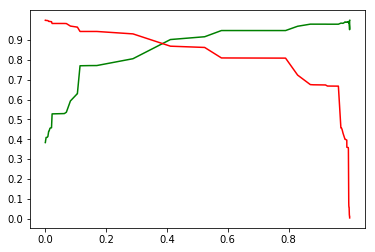

In [113]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_predicted)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.yticks(np.arange(0, 1, 0.1))
plt.xticks(np.arange(0, 1, 0.2))
plt.show()

#### 13) Making prediction on the test set

In [114]:
X_test[['Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score',
        'Asymmetrique Profile Score']]= scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit',
                         'Asymmetrique Activity Score','Asymmetrique Profile Score']])

In [115]:
X_test = X_test[col]
X_test.head()

,Lead Source_WELINGAK WEBSITE,Last Activity_SMS SENT,What matters most to you in choosing a course_OTHER,Tags_CLOSED BY HORIZZON,Tags_INVALID NUMBER,Tags_LOST TO EINS,Tags_RINGING,Tags_SWITCHED OFF,Tags_WILL REVERT AFTER READING THE EMAIL,Lead Quality_WORST,Last Notable Activity_MODIFIED
340,0,0,1,0,0,0,0,0,0,0,1
7035,0,1,0,0,0,0,0,0,0,0,0
8723,0,0,0,0,0,0,1,0,0,0,0
5188,0,0,0,0,0,0,0,0,0,1,1
8906,0,0,0,0,0,1,0,0,0,0,1


In [116]:
X_test_sm = sm.add_constant(X_test)

In [117]:
X_test_sm.columns

Index(['const', 'Lead Source_WELINGAK WEBSITE', 'Last Activity_SMS SENT',
       'What matters most to you in choosing a course_OTHER',
       'Tags_CLOSED BY HORIZZON', 'Tags_INVALID NUMBER', 'Tags_LOST TO EINS',
       'Tags_RINGING', 'Tags_SWITCHED OFF',
       'Tags_WILL REVERT AFTER READING THE EMAIL', 'Lead Quality_WORST',
       'Last Notable Activity_MODIFIED'],
      dtype='object')

In [118]:
#X_test_sm.head()

In [119]:
y_test_pred = res.predict(X_test_sm)

In [120]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test).reindex()
y_test_df['CustID'] = y_test_df.index
#tmp_df = pd.merge( leadnum_df, ProspectID_df, left_index=True, right_index=True)
#y_test_df = pd.merge(tmp_df, y_test_df, left_index=True, right_index=True)

In [121]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [122]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [123]:
y_pred_final.head()

,Converted,CustID,0
0,0,340,0.021778
1,1,7035,0.789684
2,0,8723,0.009809
3,0,5188,0.002628
4,1,8906,0.975399


In [124]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [125]:
# y_pred_final = y_pred_final.reindex_axis(['Lead Number','Prospect ID','Converted','Converted_Prob'], axis=1)
y_pred_final = y_pred_final.reindex_axis(['CustID','Converted','Converted_Prob'], axis=1)

In [126]:
y_pred_final.head(4)

,CustID,Converted,Converted_Prob
0,340,0,0.021778
1,7035,1,0.789684
2,8723,0,0.009809
3,5188,0,0.002628


In [127]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.17 else 0)

In [128]:
y_pred_final.head(2)

,CustID,Converted,Converted_Prob,final_predicted
0,340,0,0.021778,0
1,7035,1,0.789684,1


In [137]:
print('Test data accuracy: ', metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Test data accuracy:  0.8806709874189859


In [130]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_predicted.map( lambda x: 1 if x > 0.25 else 0)
#y_train_pred_final.head()

In [131]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8879847645429363

In [132]:
confusion_test_ds = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test_ds

array([[1370,  268],
       [  45,  940]])

In [133]:
TP = confusion_test_ds[1,1] # true positive 
TN = confusion_test_ds[0,0] # true negatives
FP = confusion_test_ds[0,1] # false positives
FN = confusion_test_ds[1,0] # false negatives
print("Sensitivity of Logistic Regression model", format(TP / float(TP+FN)))
print("Specificity of Logistic Regression model", format(TN / float(TN+FP)))
print("False Positive rate of Logistic Regression model", format(FP/ float(TN+FP)))
print("Positive Predictive value of Logistic Regression model", format(TP / float(TP+FP)))
print("Negative Predictive value of Logistic Regression model", format(TN / float(TN+ FN)))

Sensitivity of Logistic Regression model 0.9543147208121827
Specificity of Logistic Regression model 0.8363858363858364
False Positive rate of Logistic Regression model 0.16361416361416362
Positive Predictive value of Logistic Regression model 0.7781456953642384
Negative Predictive value of Logistic Regression model 0.9681978798586572


In [134]:
tmp_df = pd.merge( leadnum_df, ProspectID_df, left_index=True, right_index=True)
y_test_df_presentable = pd.merge(tmp_df, y_pred_final, left_index=True, right_index=True)
y_test_df_presentable = y_test_df_presentable.drop(['CustID'], axis =1)
print ( "Final dataframe shape:", format(y_test_df_presentable.shape))

y_test_df_presentable= y_test_df_presentable.rename(columns={ 'Converted_Prob' : 'Probability Score'})

print("(Rows, Columns) of dataset before dropping duplicates is :", format(y_test_df_presentable.shape))
y_test_df_presentable = y_test_df_presentable.drop_duplicates('Lead Number')
print("(Rows, Columns) of dataset after dropping duplicates is :", format(y_test_df_presentable.shape))
print("Final dataframe looks as follows (and we can export it as csv/ load to DB if needed ) :")
y_test_df_presentable.head(10)


Final dataframe shape: (2446, 5)
(Rows, Columns) of dataset before dropping duplicates is : (2446, 5)
(Rows, Columns) of dataset after dropping duplicates is : (2446, 5)
Final dataframe looks as follows (and we can export it as csv/ load to DB if needed ) :


,Lead Number,Prospect ID,Converted,Probability Score,final_predicted
0,660737,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.021778,0
1,660728,2a272436-5132-4136-86fa-dcc88c88f482,1,0.789684,1
2,660727,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0.009809,0
3,660719,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0.002628,0
4,660681,3256f628-e534-4826-9d63-4a8b88782852,1,0.975399,1
5,660680,2058ef08-2858-443e-a01f-a9237db2f5ce,1,0.963011,1
6,660673,9fae7df4-169d-489b-afe4-0f3d752542ed,0,0.289071,1
7,660664,20ef72a2-fb3b-45e0-924e-551c5fa59095,0,0.009809,0
8,660624,cfa0128c-a0da-4656-9d47-0aa4e67bf690,0,0.009809,0
9,660616,af465dfc-7204-4130-9e05-33231863c4b5,0,0.106614,0


##### Coefficients from the final Statsmodel analysis

`Field name	coef(abs)	coef	std err	z	P>|z|	[0.025	0.975]` <br>
Tags_CLOSED BY HORIZZON	7.234	7.234	1.01	7.162	0	5.254	9.214 <br>
Tags_LOST TO EINS	6.259	6.259	0.576	10.874	0	5.131	7.387 <br>
Lead Source_WELINGAK WEBSITE	4.4889	4.4889	1.028	4.365	0	2.473	6.505 <br>
Tags_WILL REVERT AFTER READING THE EMAIL	4.1594	4.1594	0.178	23.433	0	3.811	4.507 <br>
Tags_SWITCHED OFF	4.0078	-4.0078	0.524	-7.643	0	-5.036	-2.98 <br>
Tags_RINGING	3.7147	-3.7147	0.233	-15.936	0	-4.172	-3.258 <br>
Tags_INVALID NUMBER	3.4624	-3.4624	1.047	-3.307	0.001	-5.515	-1.41 <br>
Lead Quality_WORST	3.3601	-3.3601	0.491	-6.847	0	-4.322	-2.398 <br>
Last Activity_SMS SENT	2.2229	2.2229	0.109	20.463	0	2.01	2.436 <br>
Last Notable Activity_MODIFIED	1.679	-1.679	0.117	-14.322	0	-1.909	-1.449 <br>
What matters most to you in choosing a course_OTHER	1.2259	-1.2259	0.111	-11.094	0	-1.442	-1.009 <br>



NEGATIVE coefficients indicates negative impact of variables		<br> 					
POSITIVE coefficients indicates positive impact of variables		<br>					

#### Summary and answers for the workbook questions

1.	Which are the top three variables in your model which contribute most towards the probability of a lead getting converted? <br>

Answer: <br>
1) `Tags` <br>
2) `Lead Source` <br>
3) `Last activity` <br>

<br>

2.	What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?

1) `Tags` that are `Closed by Horizon` <br>
2) `Tags`that are marked `Lost to EINS` ; tag name is misleading us to believe that it must be negatively impacting, but as per data it is not negatively impacting and appears to be a positive driver for leads sales team  <br>
3) `Lead Source` that are tagged as  `Welingak website` <br>

<br>

3.	X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage. <br>

Answer: Follow coefficient as indicated by a cut-off more than 4.4 ; avoid variables which show as negatively impacting. Top 3 variables making it to the cut-off are : 

1) `Tags` that are `Closed by Horizon` with a coefficient of `7.2` <br>
2) `Tags`that are marked `Lost to EINS` ; tag name is misleading us to believe that it must be negatively impacting, but as per data it is not negatively impacting and appears to be a positive driver for leads sales team  ; with a coefficient of `6.3` <br>
3) `Lead Source` that are tagged as  `Welingak website` ; coefficient of `4.5` <br>

<br>

4.	Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage. <br>


Answer : <br>

Strategy 1: <br>

1) Focus on `negative coefficients` i.e. in this case `avoid reaching out to INVALID NUMBER` and chasing the users who have been tagged as `RINGING` or `SWITCHED OFF`. This way, you will be minimizing the cost. i.e. go with `reducing the cost` instead of `increasing the profit` as the `profit` criteria is already met! <br>


Strategy 2: <br>
2) During this time the team does not care about model accuracy. In our opinion during this phase, an alternate model which is less aggressive and which relies mostly on auto-click, auto-enroll, and users who respond `proactively` are targeted. hence the model accuracy can just focus on such columns when we build the same. Since the target is less aggressive, we defer this to the judgement that management chooses. <br>



In [135]:
# End of code, print total time taken for execution
print('\nTime elasped: ', datetime.now() - startTime)
#


Time elasped:  0:00:31.133251
